In [14]:
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd  
import seaborn as seabornInstance 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import chi2


def main():
    columns=['normalising_temperature','tempering_temperature', 'sample_id', 'percent_silicon', 'percent_chromium', 'manufacture_year',
    'percent_copper', 'percent_nickel', 'percent_sulphur', 'percent_carbon', 'percent_manganese', 'tensile_strength']
    raw_data = pd.read_csv('c:/Users/GANESH/Desktop/steel.txt', delimiter='\t', na_values="n/a")
    named_data = pd.DataFrame(raw_data.values, columns= columns)
    tensile_strength = named_data['tensile_strength']
    features = named_data.drop(columns=['sample_id','tensile_strength'])
    features_train, features_test, values_train, values_test = train_test_split(features, tensile_strength, test_size=0.2, random_state=0)
    scaler = preprocessing.MinMaxScaler()
    scaled_train = scaler.fit_transform(features_train)
    scaled_test = scaler.transform(features_test)
    
    selectKBest = SelectKBest(score_func = f_regression, k=5)
    features_selected_train = selectKBest.fit_transform(scaled_train, values_train)
    features_selected_test =selectKBest.transform(scaled_test)
    
    selectKBest = SelectKBest(f_regression)
    scores = selectKBest.fit(scaled_train, values_train)
    columns.remove('sample_id')
    columns.remove('tensile_strength')
    df = pd.DataFrame({'features': columns, 'score': scores.scores_})

    print('Scores :')
    print(df)

main()

Scores :
                  features       score
0  normalising_temperature  126.639260
1    tempering_temperature  199.693673
2          percent_silicon    5.352917
3         percent_chromium    1.681962
4         manufacture_year    0.264752
5           percent_copper   31.849727
6           percent_nickel    0.774448
7          percent_sulphur   76.304385
8           percent_carbon   76.443599
9        percent_manganese    0.303352


KNN
0.504873297
0.70282118 0.26147638
Linear
0.409186092
0.54957137 0.30531402


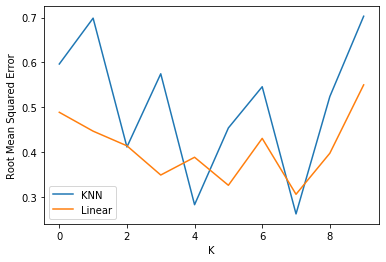

Ttest_relResult(statistic=2.652444959540078, pvalue=0.02637030814333781)


In [16]:


from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
# data = {'KNN': [0.25680763311451216, 0.021120053593630228, 0.7881879277217374, 0.7146998528936469, 0.7111470008069283, 0.7751148412547408, 0.59402999883185, 0.7412709744641772, 0.5859739595139137, -0.25709559859311204],
#         'Linear': [0.5080170758250748, 0.3079838035219844, 0.7097809061563494, 0.6578498596989206, 0.6860250687333251, 0.7652125387888907, 0.5857154142376002, 0.8366871542697906, 0.7912990345453031, 0.7634588296806208]}

data = {'KNN': [0.5961707,  0.69852502, 0.41091475, 0.57435638, 0.2820633, 0.45342928, 0.54542363, 0.26147638, 0.52355235, 0.70282118],
        'Linear': [0.48837849, 0.44625895, 0.41354131, 0.34832242, 0.38797495, 0.32542043,0.43013604, 0.30531402, 0.39694294, 0.54957137]}
for k, v in data.items():
    plt.plot(v, label=k)
    print(k)
    print(np.average(v))
    print(max(v), min(v))
plt.xlabel('K')
plt.ylabel('Root Mean Squared Error')
plt.legend(loc="best")
plt.show()
print(stats.ttest_rel(data['KNN'],data['Linear']))